# **네이버 영화 평점 기준, 영화 평점 변화 확인하기**

* **https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190409**

* **아래 사진에서 영화 제목이 나오는 곳의 태그를 확인할 수 잇습니다.**
![대체 텍스트](https://user-images.githubusercontent.com/42408554/55869969-90a49900-5bc2-11e9-8fc0-a224e6025b3f.png)

In [0]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd

In [0]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170804'

page = urlopen(url)

soup = BeautifulSoup(page, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20170804" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


* **위에서 확인한 것처럼 find_all을 사용해 div 태그의 tit5를 불러옵니다.**

In [0]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10448" title="오즈의 마법사">오즈의 마법사</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154437" title="내 사랑">내 사랑</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=160135" title="서서평, 천천히 평온하게">서서평, 천천히 평온하게</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10217" title="로보캅">로보캅</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=76309" title="플립">플립</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=159054" title="명탐정 코난:진홍의 연가">명탐정 코난:진홍의 연가</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=3182

In [0]:
# 첫 번째 영화 불러오기
soup.find_all('div', 'tit5')[0].a.string

'다크 나이트'

* **평점은 아래와 같이 td 태그의 point에 나타나있습니다.**
![대체 텍스트](https://user-images.githubusercontent.com/42408554/55871451-95b71780-5bc5-11e9-8362-3300ce42384d.png)

In [0]:
# 평점 불러오기
soup.find_all('td', 'point')[0].string

'9.32'

* **5월 1일부터 100일간으로 정의하고 그 날짜에 해당하는 영화 정보 전체를 찾도록 하겠습니다.**

In [0]:
# 2017년 5월 1일부터 100일간의 날짜 출력하기
import numpy as np
date = pd.date_range('2017-5-1', periods = 100, freq = 'D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [0]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    
    html = 'http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
    
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'html.parser')
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

In [0]:
movie = pd.DataFrame({'date':movie_date, 'name': movie_name, 'point': movie_point})

movie.head()

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


In [0]:
import numpy as np

movie_unique = pd.pivot_table(movie, index = ['name'], aggfunc = np.sum)
movie_best = movie_unique.sort_values(by = 'point', ascending = False)
movie_best.head()

,point
name,
"서서평, 천천히 평온하게",9.569.479.489.409.399.359.319.309.299.289.299....
극장판 쿠로코의 농구 라스트 게임,9.539.299.259.269.269.269.279.279.259.239.249....
킹 오브 프리즘 프라이드 더 히어로,9.449.349.279.249.259.279.279.279.269.279.289....
명탐정 코난:진홍의 연가,9.439.239.189.169.109.079.05
레옹,9.389.38


In [0]:
tmp = movie.query('name == ["노무현입니다"]')
tmp.head()

,date,name,point
1162,2017-05-25,노무현입니다,9.20
1215,2017-05-26,노무현입니다,8.97
1255,2017-05-27,노무현입니다,9.04
1298,2017-05-28,노무현입니다,9.04
1340,2017-05-29,노무현입니다,9.05


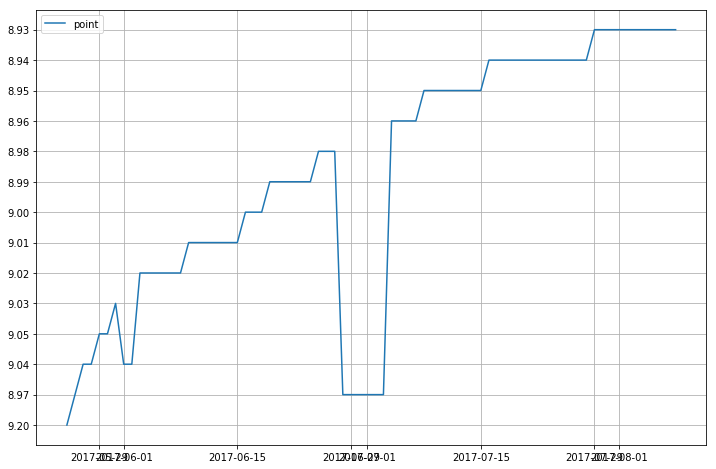

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12, 8))

plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()